# What Do You Know About Your Favourite Cereals


## Introduction
Cereals have become a stable part of our diet. Over the years it has become popular not just amongst children, adults find it a delicious way to start their busy day. To meet the expectations of customers, cereals manufacturers have develop differents brands with unique features. In the past, majority would settle for any brand but in resent times, alot of individuals have become quite concious about their health especially the calory content of their foods.

If you have ever wondered about the component of the nutrients of your favourite cereals, then you would be interested in the insight contained in this  cereal data set. I promise you, at the end of this analysis, you will never see your favourite cereals the same way again!

The data  set consist of the following headings:
* Brand name
* Manufactuer
* Type
* Calories
* Protein
* Fat
* Sodium
* Fiber
* Vitamins and
* customer rating


## Import Libraries and load the data set

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0,10.0)
plt.rcParams.update({'font.size':22})

In [222]:
cereals = pd.read_csv("cereal.csv")

In [223]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [224]:
cereals.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [225]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [226]:
cereals.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## Who is the top manufacturer?
From the bar chart it's crystal clear that **'K'** manufacture most brands of cereals in this data set which is closely follwed by **'G'**

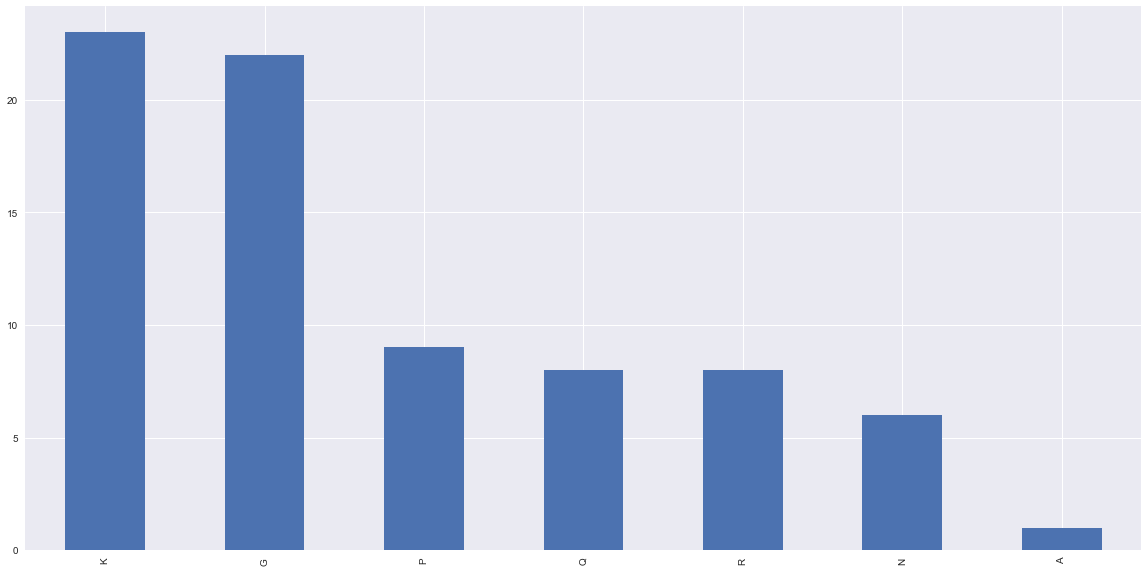

In [227]:
cereals['mfr'].value_counts().plot(kind='bar')

## Average Calories content in cereals group by manufacturers

In [228]:
cereals.groupby('mfr')['calories'].mean()

mfr
A    100.000000
G    111.363636
K    108.695652
N     86.666667
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64

## Average rating of customer group by manufacturers
From the bar graph it's quite clear that cereals consumers have on the average rated cereals manufactured by **'N'** more than any manufacturers. There must be something about cereal brands manufactured by **'N'**

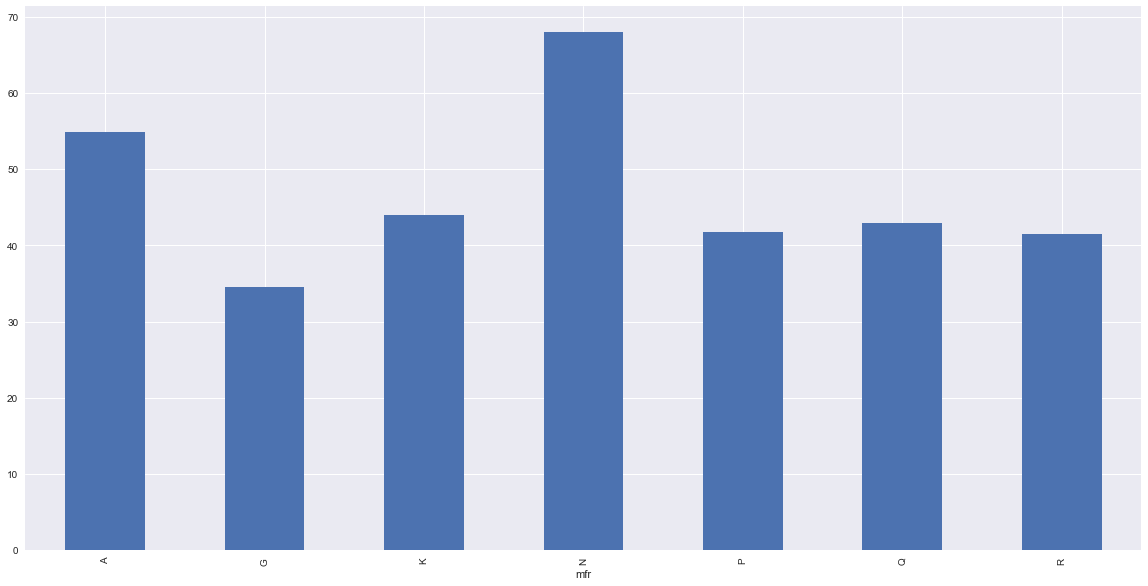

In [229]:
cereals.groupby('mfr')['rating'].mean().plot(kind='bar')

## Brands of cereals manufactured by 'N'

In [230]:
new_heading = cereals[['mfr','name', 'rating']]
new_heading[cereals.mfr=='N']

,mfr,name,rating
0,N,100% Bran,68.402973
20,N,Cream of Wheat (Quick),64.533816
63,N,Shredded Wheat,68.235885
64,N,Shredded Wheat 'n'Bran,74.472949
65,N,Shredded Wheat spoon size,72.801787
68,N,Strawberry Fruit Wheats,59.363993


## The factors driving the high rating of cereals manufactured by 'N'
Amongst the cereals manufactured by **"K"** two are given a rating more than 70. I know you are curious about the names of these cereals. However we can see that the factors responsible for high rating of Cereals manaufactured by **"K"** are a combination of factors but we can see that such cereals have a combination of calories, fiber and protein with reasonable high fiber contents.

In [231]:
factors = cereals[['sodium','vitamins', 'calories', 'fiber','protein','sugars']]
factors[cereals.mfr=='N'][cereals.rating>70]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,sodium,vitamins,calories,fiber,protein,sugars
64,0,0,90,4.0,3,0
65,0,0,90,3.0,3,0


## Relationship between the fiber contents of  cereals and the rating they had




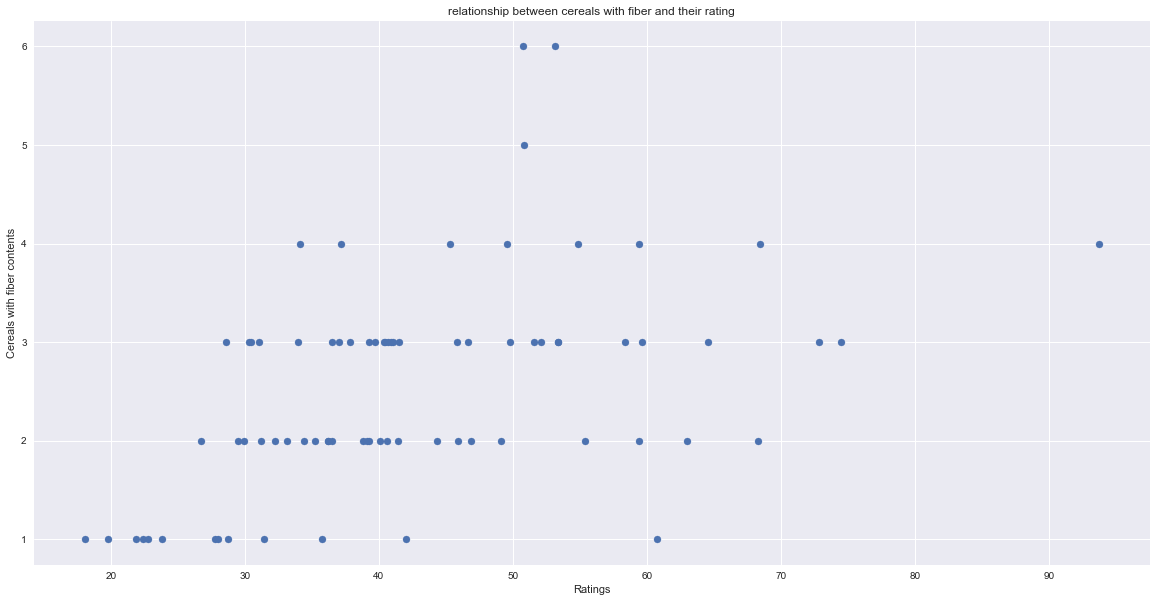

In [236]:
#scatter plot
plt.scatter(x =cereals['rating'], y=cereals['protein'])
plt.xlabel('Ratings')
plt.ylabel('Cereals with fiber contents')
plt.title('relationship between cereals with fiber and their rating')

In [237]:
cereals[['name','mfr', 'rating','calories','fiber', 'sodium' ]].sort_values(by='calories', ascending = False).head()

,name,mfr,rating,calories,fiber,sodium
46,Mueslix Crispy Blend,K,30.313351,160,3.0,150
44,Muesli Raisins; Dates; & Almonds,R,37.136863,150,3.0,95
45,Muesli Raisins; Peaches; & Pecans,R,34.139765,150,3.0,150
70,Total Raisin Bran,G,28.592785,140,4.0,190
39,Just Right Fruit & Nut,K,36.471512,140,2.0,170


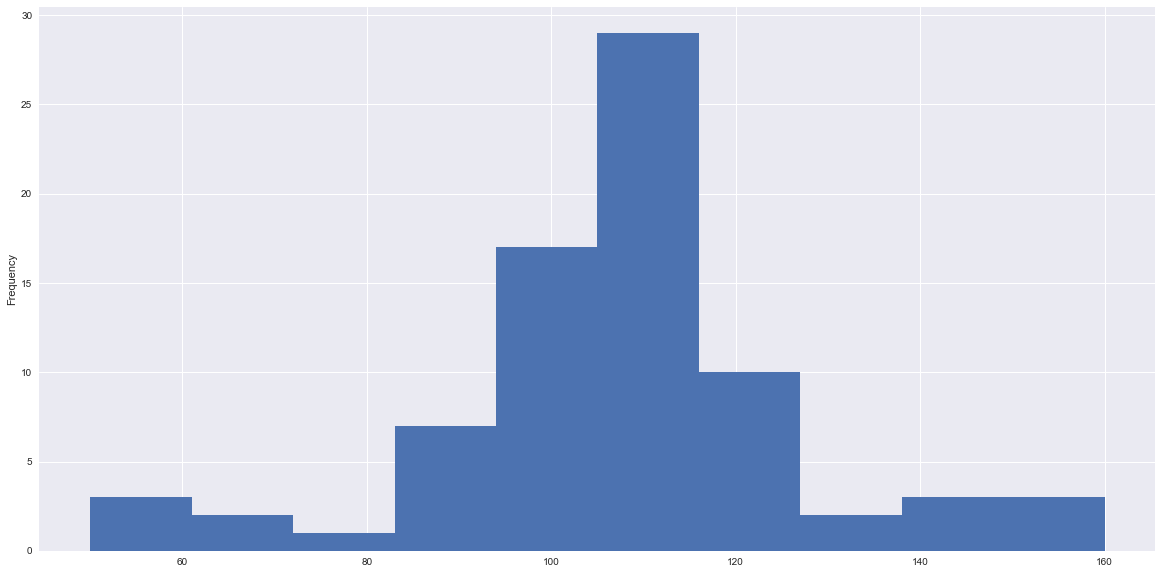

In [238]:
cereals['calories'].plot(kind='hist')

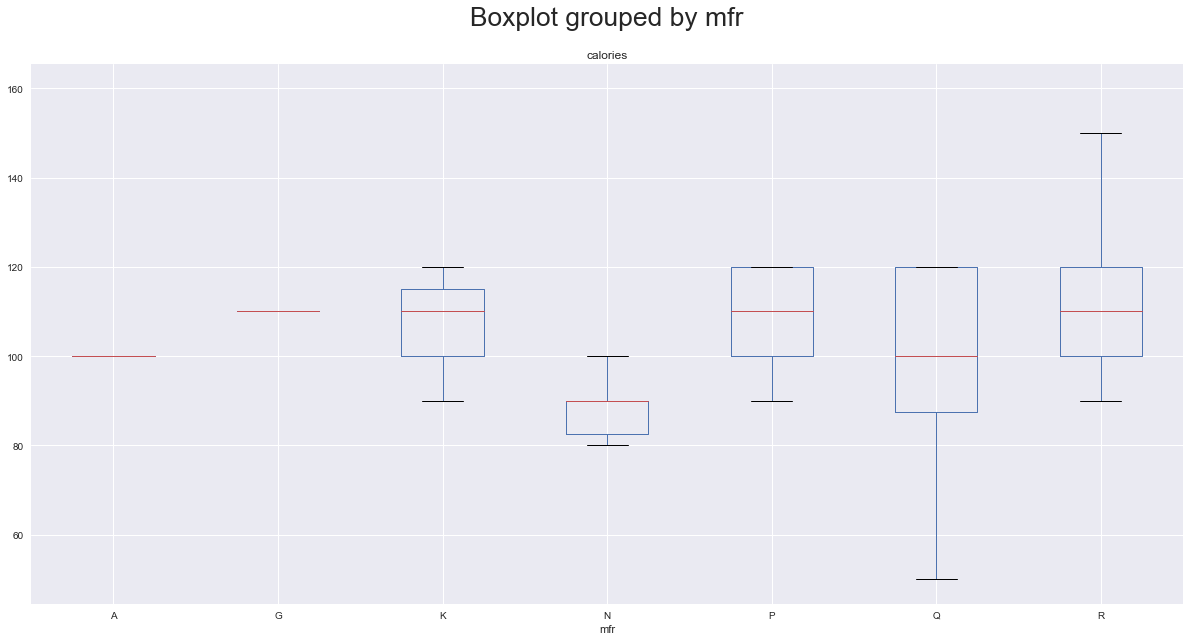

In [235]:
cereals.boxplot(column='calories', by='mfr')

## Subplots Charts
We have used subplot to render the following charts:
* scatter plot
* line plot
* hist plot
Using the four rows by two column format

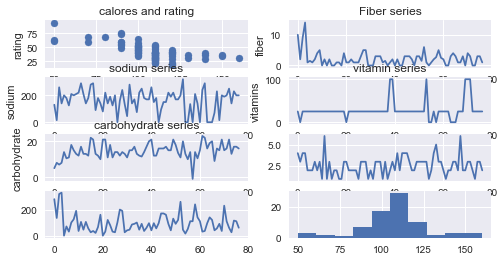

In [272]:
plt.figure(figsize= (8,4)) 

plt.subplot(4,2,1)
plt.scatter(x=cereals['calories'], y=cereals['rating'])
plt.xlabel('calories')
plt.ylabel('rating')
plt.title('calores and rating')

plt.subplot(4,2,2)
plt.plot(cereals['fiber'])
plt.ylabel('fiber')
plt.title('Fiber series')

plt.subplot(4,2,3)
plt.plot(cereals['sodium'])
plt.ylabel('sodium')
plt.title('sodium series')

plt.subplot(4,2,4)
plt.plot(cereals['vitamins'])
plt.ylabel('vitamins')
plt.title('vitamin series')

plt.subplot(4,2,5)
plt.plot(cereals['carbo'])
plt.ylabel('carbohydrate')
plt.title('carbohydrate series')


plt.subplot(4,2,6)
plt.plot(cereals['protein'])

plt.subplot(4,2,7)
plt.plot(cereals['potass'])

plt.subplot(4,2,8)
plt.hist(cereals['calories'])




plt.show()

